In [20]:
import sarPrm as sP
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable


## Generate IGP image

[Text(0.5, 0, 'Eje x(m)'),
 Text(0, 0.5, 'Eje y(m)'),
 Text(0.5, 1.0, 'Imagen para la simulación')]

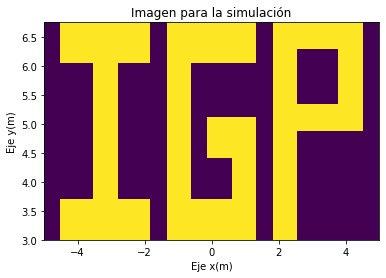

In [21]:
ro_x, ro_y = -5, 3 # Posicion inicial (x,y)m
d_x, d_y = 0.25,0.25#0.125,0.125 #0.25, 0.25 # Paso en los ejes (x,y)m
N_r, N_c = 16,41

# Formando las letras x separado
# Letra I
letraI = np.array([[1]*11]*3+[[0]*4+[1]*3+[0]*4]*10+[[1]*11]*3)
# Letra U
letraG = np.array([[1]*11]*3+[[1]*3+[0]*5+[1]*3]*3+[[1]*3+[0]*2+[1]*6]*3+[[1]*3+[0]*8]*4+[[1]*11]*3)
# Letra N
letraP = np.array([[[1]*3+[0]*8]*8 + [[1]*11]*2 + [[1]*3+[0]*5+[1]*3]*4 + [[1]*11]*2])

# Joining all the letters
Data = np.zeros((16,41))
Data[:,2:13] = letraI
Data[:,15:26] = letraG
Data[:,28:39] = letraP

I_t = Data.reshape(1,N_r*N_c)[0] # Vector de intensidades

rt_x=ro_x+d_x*np.arange(N_c) # Coordenada x de los targets(empezando en ro_x)
rt_y=ro_y+d_y*np.arange(N_r) # Coordenada y de los targets(empezando en ro_y)
rt=np.array([(x,y) for y in rt_y for x in rt_x]) #  Vector de coordenadas (x,y)

# Grafica de la imagen a simular
fig, ax = plt.subplots()
ax.imshow(Data,aspect='auto',origin='lower',extent=[rt_x.min(), rt_x.max(), rt_y.min(),rt_y.max()])
ax.set(xlabel='Eje x(m)',ylabel='Eje y(m)', title='Imagen para la simulación')



## Comparación de imágenes

In [25]:
def plotImage(data, x_min=None, x_max=None, y_min=None, y_max=None, xlabel_name=None, ylabel_name=None, title_name=None, unit_bar='', origin_n='lower', log=False, vmin=None,vmax=None,cmap="hot",orientation = "H",ticks=None):
    """
    Parameters
    ----------
    data : 2D-matrix
        Data a ser mostrado como figura
    x_min : float
        Valor mínimo del eje "x"
    x_max : float
        Valor máximo del eje "x"
    y_min : float
        Valor mínimo del eje "y"
    y_max : float
        Valor máximo del eje "y"

    Returns
    -------
    A message confirmation.
    """
    #np.savetxt("/home/diegopalma/Documents/github/roj_sar/GBSAR_Angle_Imaging_Algorithms/Simulation/arrays/RMA_1_data.txt", data)
    r_data = abs(data)
    if log: r_data = 20*np.log10(r_data)
    #if orientation == "H": nr,nc = 1,2 # Number of figure rows and columns
    #elif orientation == "V": nr,nc = 2,1

    if orientation == "H":
        fig, ax = plt.subplots(1,2,figsize=(12,6))#,sharex=True)
    elif orientation == "V":
        fig, ax = plt.subplots(2,1,figsize=(4,9))
    
    # Magnitude
    im1=ax[0].imshow(r_data,cmap=cmap,origin=origin_n,extent=[x_min, x_max, y_min, y_max], aspect='auto',vmin=vmin,vmax=vmax)
    ax[0].set(xlabel=xlabel_name, ylabel=ylabel_name, title="(Magnitud)") # Origin 'upper': esquina superior izquierda; 'lower': esquina inferior izquierda
    divider1 = make_axes_locatable(ax[0])
    cax1 = divider1.append_axes("right", size="5%", pad=0.1) # pad es el espaciado con la grafica principal
    sfmt=ticker.ScalarFormatter(useMathText=True)
    m=fig.colorbar(im1,cax=cax1,label=unit_bar,extend='both',ticks=ticks,format=sfmt)
    m.formatter.set_powerlimits((0, 0))
    m.ax.yaxis.set_offset_position('left')
    m.update_ticks()
    ax[0].grid(ls='--')

    # Phase
    im2=ax[1].imshow(np.angle(data), cmap, origin=origin_n, extent=[x_min, x_max, y_min, y_max], aspect='auto')#vmin=-600,vmax=-100)
    ax[1].set(xlabel=xlabel_name,ylabel=ylabel_name, title="(Fase)")
    divider2 = make_axes_locatable(ax[1])
    cax2 = divider2.append_axes("right", size="5%", pad=0.1) # pad es el espaciado con la grafica principal
    ax[1].grid(ls='--')
    

    plt.colorbar(im2,cax=cax2,label='(rad)',extend='both')
    fig.suptitle(title_name)
    if orientation == "H":
        fig.subplots_adjust(left=0.065, right=0.95, wspace=0.3)
        #fig.tight_layout() # cuadra bien las imagenes
        if title_name != None:
            fig.savefig("../figures/"+"RD1_2)"+"prueba_1",orientation='landscape')
    return 'Ok'
    
def plot_image_FDBP(data2):
    """ Grafica la magnitud de la imagen"""

    # a) Definicion y lectura de parametros
    Im = data2['Im']
    Lx = data2['Lx']
    Ly = data2['Ly']
    dx = data2['dx']
    dy = data2['dy']
    # b) Grafica final(magnitud)
    cmap="plasma"
    vmin = -100 #dB
    vmax = -20
    plotImage(Im,cmap=cmap,xlabel_name='Azimut(m)',ylabel_name='Rango(m)', title_name='Resultado Algoritmo Back Projection',
                 x_min=-(Lx+dx)/2, x_max=(Lx+dx)/2, y_min=0-dy/2, y_max=Ly+dy/2,unit_bar='(dB)',log=True,vmin=vmin,
                 vmax=vmax)

def plot_image_RMA(data2):
    """ Grafica la magnitud de la imagen"""
    # Save data
    np.save('../image_data/RMA_1_data.npy', data2)

    # a) Definicion y lectura de parametros
    Im = data2['Im'].copy()
    x = data2['x']
    y = data2['y']

    dx = x[1]-x[0]
    dy = y[1]-y[0]

    # c) Grafica final(magnitud)
    cmap="plasma"
    vmin = -100 #dB
    vmax = -20
    plotImage(Im,cmap=cmap,xlabel_name='Azimut(m)',ylabel_name='Rango(m)', title_name='Resultado Algoritmo Range Migration',
                 x_min=x[0]-dx/2, x_max=x[-1]+dx/2, y_min=y[0]-dy/2, y_max=y[-1]+dy/2,unit_bar='(dB)',log=True,vmin=vmin,
                 vmax=vmax)

def subplots_mag(data1, data2, data3, x_min=None, x_max=None, y_min=None, y_max=None, xlabel_name=None, ylabel_name=None, title_name=None, unit_bar='', origin_n='lower', log=False, vmin=None,vmax=None,cmap="hot",orientation = "H",ticks=None):
    
    r_data1 = abs(data1)
    r_data2 = abs(data2)
    r_data3 = abs(data3)

    r_data1 = 20*np.log10(r_data1)
    r_data2 = 20*np.log10(r_data2)
    r_data3 = 20*np.log10(r_data3)

    #if orientation == "H": nr,nc = 1,2 # Number of figure rows and columns
    #elif orientation == "V": nr,nc = 2,1

    if orientation == "H":
        fig, ax = plt.subplots(1,2,figsize=(12,6))#,sharex=True)
    elif orientation == "V":
        fig, ax = plt.subplots(2,1,figsize=(4,9))
    
    # Magnitude1
    im1=ax[1].imshow(r_data1,cmap=cmap,origin=origin_n,extent=[x_min, x_max, y_min, y_max], aspect='auto',vmin=vmin,vmax=vmax)
    ax[1].set(xlabel=xlabel_name, ylabel=ylabel_name, title="(Magnitud)") # Origin 'upper': esquina superior izquierda; 'lower': esquina inferior izquierda
    divider1 = make_axes_locatable(ax[1])
    cax1 = divider1.append_axes("right", size="5%", pad=0.1) # pad es el espaciado con la grafica principal
    sfmt=ticker.ScalarFormatter(useMathText=True)
    m=fig.colorbar(im1,cax=cax1,label=unit_bar,extend='both',ticks=ticks,format=sfmt)
    m.formatter.set_powerlimits((0, 0))
    m.ax.yaxis.set_offset_position('left')
    m.update_ticks()
    ax[1].grid(ls='--')

    # Magnitude2
    im2 =ax[1].imshow(r_data2,cmap=cmap,origin=origin_n,extent=[x_min, x_max, y_min, y_max], aspect='auto',vmin=vmin,vmax=vmax)
    ax[1].set(xlabel=xlabel_name, ylabel=ylabel_name, title="(Magnitud)") # Origin 'upper': esquina superior izquierda; 'lower': esquina inferior izquierda
    divider1 = make_axes_locatable(ax[1])
    cax1 = divider1.append_axes("right", size="5%", pad=0.1) # pad es el espaciado con la grafica principal
    sfmt=ticker.ScalarFormatter(useMathText=True)
    m=fig.colorbar(im1,cax=cax1,label=unit_bar,extend='both',ticks=ticks,format=sfmt)
    m.formatter.set_powerlimits((0, 0))
    m.ax.yaxis.set_offset_position('left')
    m.update_ticks()
    ax[1].grid(ls='--')

    # Magnitude3
    im1=ax[2].imshow(r_data3,cmap=cmap,origin=origin_n,extent=[x_min, x_max, y_min, y_max], aspect='auto',vmin=vmin,vmax=vmax)
    ax[2].set(xlabel=xlabel_name, ylabel=ylabel_name, title="(Magnitud)") # Origin 'upper': esquina superior izquierda; 'lower': esquina inferior izquierda
    divider1 = make_axes_locatable(ax[2])
    cax1 = divider1.append_axes("right", size="5%", pad=0.1) # pad es el espaciado con la grafica principal
    sfmt=ticker.ScalarFormatter(useMathText=True)
    m=fig.colorbar(im1,cax=cax1,label=unit_bar,extend='both',ticks=ticks,format=sfmt)
    m.formatter.set_powerlimits((0, 0))
    m.ax.yaxis.set_offset_position('left')
    m.update_ticks()
    ax[2].grid(ls='--')

    plt.colorbar(im2,cax=cax2,label='(rad)',extend='both')
    fig.suptitle(title_name)
    if orientation == "H":
        fig.subplots_adjust(left=0.065, right=0.95, wspace=0.3)
        #fig.tight_layout() # cuadra bien las imagenes
        if title_name != None:
            fig.savefig("../figures/"+"RD1_2)"+"prueba_1",orientation='landscape')
    return 'Ok'


In [26]:
data_fdbp = np.load('../image_data/FDBP_1_data.npy', allow_pickle='TRUE').item()
data_rma = np.load('../image_data/RMA_1_data.npy', allow_pickle='TRUE').item()


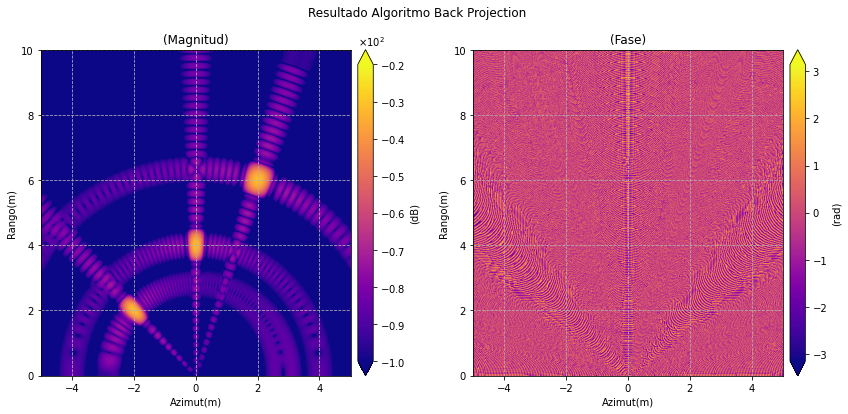

In [27]:
plot_image_FDBP(data_fdbp)